# Objective: 
Look for an algorithm which can tell if a statemnt was written by V.I. Lenin

In [1]:
# Import libraries
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
vocab_size = 20000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'

In [3]:
# Import JSON file with file
!wget http://leninism.masaccio.io/lenin_dataset.json

--2020-12-12 06:06:02--  http://leninism.masaccio.io/lenin_dataset.json
Resolving leninism.masaccio.io (leninism.masaccio.io)... 162.241.252.206
Connecting to leninism.masaccio.io (leninism.masaccio.io)|162.241.252.206|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1733319 (1.7M) [application/json]
Saving to: ‘lenin_dataset.json’

lenin_dataset.json  100%[===================>]   1.65M  3.51MB/s    in 0.5s    

2020-12-12 06:06:03 (3.51 MB/s) - ‘lenin_dataset.json’ saved [1733319/1733319]



In [4]:
# Convert JSON to Lists
with open('lenin_dataset.json', 'r') as f:
  datastore = json.load(f)

statements = []
labels = []

for item in datastore:
  statements.append(item['statement'])
  labels.append(item['is_lenin'])

In [5]:
# Split the data between training and testing sets
training_size = round(len(statements) * 0.8)
training_statements = statements[0:training_size]
testing_statements = statements[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [6]:
# Tokenize the words in the set and fit the sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_statements)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_statements)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_statements)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [7]:
# Convert lists to arrays
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)

testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [8]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           320000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 320,433
Trainable params: 320,433
Non-trainable params: 0
_________________________________________________________________


In [10]:
num_epochs = 30
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
61/61 - 0s - loss: 0.6770 - accuracy: 0.5994 - val_loss: 0.6575 - val_accuracy: 0.6116
Epoch 2/30
61/61 - 0s - loss: 0.6419 - accuracy: 0.6004 - val_loss: 0.6141 - val_accuracy: 0.6116
Epoch 3/30
61/61 - 0s - loss: 0.5698 - accuracy: 0.6572 - val_loss: 0.5289 - val_accuracy: 0.7025
Epoch 4/30
61/61 - 0s - loss: 0.4570 - accuracy: 0.8121 - val_loss: 0.4201 - val_accuracy: 0.8471
Epoch 5/30
61/61 - 0s - loss: 0.3304 - accuracy: 0.9308 - val_loss: 0.3232 - val_accuracy: 0.8905
Epoch 6/30
61/61 - 0s - loss: 0.2280 - accuracy: 0.9623 - val_loss: 0.2565 - val_accuracy: 0.9256
Epoch 7/30
61/61 - 0s - loss: 0.1621 - accuracy: 0.9742 - val_loss: 0.2161 - val_accuracy: 0.9318
Epoch 8/30
61/61 - 0s - loss: 0.1209 - accuracy: 0.9835 - val_loss: 0.1927 - val_accuracy: 0.9360
Epoch 9/30
61/61 - 0s - loss: 0.0937 - accuracy: 0.9881 - val_loss: 0.1783 - val_accuracy: 0.9298
Epoch 10/30
61/61 - 0s - loss: 0.0746 - accuracy: 0.9897 - val_loss: 0.1628 - val_accuracy: 0.9421
Epoch 11/30
61/61 -

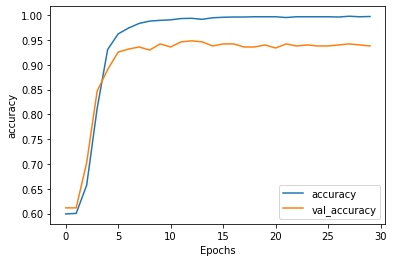

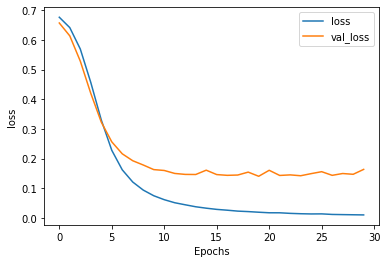

In [11]:
# Plot loss and accuracy per iteration
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [12]:
# Test accuracy with new staements

statement = ["The transfer of state enterprises to the so-called profit basis is inevitably and inseparably connected with the New Economic Policy; in the near future this is bound to become the predominant, if not the sole, form of state enterprise. In actual fact, this means that with the free market now permitted and developing the state enterprises will to a large extent be put on a commercial basis. In view of the urgent need to increase the productivity of labour and make every state enterprise pay its way and show a profit, and in view of the inevitable rise of narrow departmental interests and excessive departmental zeal, this circumstance is bound; to create a certain conflict of interests in matters concerning labour conditions between the masses of workers and the directors and managers of the state enterprises, or the government departments in charge of them. Therefore, as regards the socialised enterprises, it is undoubtedly the duty of the trade unions to protect the interests of the working people, to facilitate as far as possible the improvement of their standard of living, and constantly to correct the blunders and excesses of business organisations resulting from bureaucratic distortions of the state apparatus."]
sequences = tokenizer.texts_to_sequences(statement)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[0.99989736]]
